 ## Ch5. Regression

### 5.4 보스턴 주택 가격 예측

In [5]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from scipy import stats
from sklearn.datasets import load_boston

boston = load_boston()

In [8]:
bostonDF = pd.DataFrame(boston.data, columns= boston.feature_names)
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
bostonDF.shape

(506, 14)

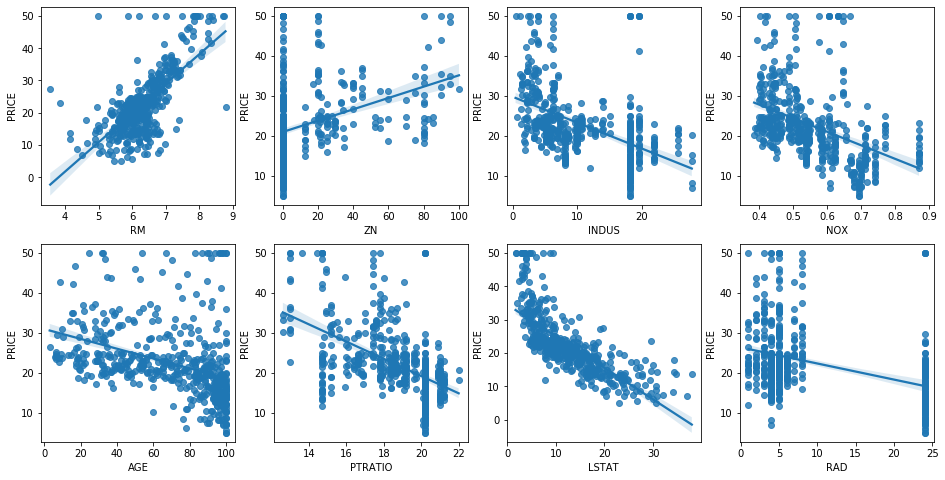

In [10]:
fig, axs= plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    #시본의 regplot을 이용해 산점도와 선형 회구 직선을 함께 표헌
    sns.regplot(x=feature, y='PRICE',data=bostonDF, ax=axs[row][col])

In [11]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


 ### 단일 변수에 대한 선형회귀

In [13]:
X = boston.data[:,5]
Y = boston.target

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=156)

 - 모델 불러와 객체 생성

In [15]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

 - 모델 학습하기

In [16]:
sim_lr.fit(x_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 - 결과 예측하기

In [17]:
y_pred = sim_lr.predict(x_test.reshape(-1,1))

 - 결과 확인하기

In [18]:
from sklearn. metrics import r2_score
r2_score(y_test, y_pred)

0.5392348356231995

 - 계수 w(weight), 절편 b(bias)

In [19]:
sim_lr.coef_,[sim_lr.intercept_]

(array([8.78948225]), [-32.40723965886481])

- 도출한 회귀식 : PRECE = 9.99 * RN - 40.0

 - 산점도와 회귀선 그리기

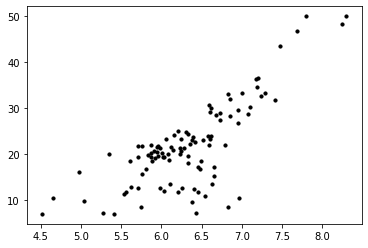

In [20]:
plt.scatter(x_test, y_test, s=10, c='black')
line_x = np.linspace(np.min(x_test),np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))
plt.show()

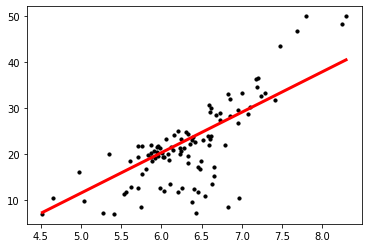

In [21]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

In [22]:
w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,8])
ys = w*xs+b
ys

array([ 2.75068936, 37.90861837])

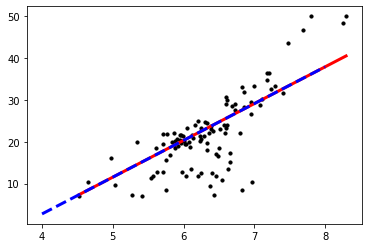

In [23]:
plt.scatter(x_test,y_test,s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(xs,ys,c='blue', lw=3, ls='--')
plt.show()

In [24]:
# PRICE vs LSTAT
X = boston.data[:,12]
Y = boston.target

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

In [26]:
from sklearn.linear_model import LinearRegression
sim_lr = LinearRegression()

In [27]:
sim_lr.fit(x_train.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
y_pred = sim_lr.predict(x_test.reshape(-1,1))

In [29]:
from sklearn. metrics import r2_score
r2_score(y_test, y_pred)

0.5197154926220184

In [30]:
sim_lr.coef_,[sim_lr.intercept_]

(array([-0.8922435]), [33.591648794612624])

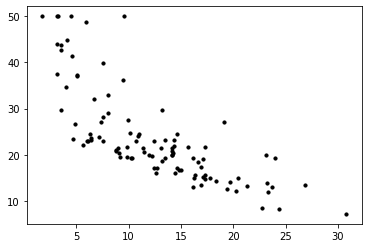

In [31]:
plt.scatter(x_test, y_test, s=10, c='black')
line_x = np.linspace(np.min(x_test),np.max(x_test), 10)
line_y = sim_lr.predict(line_x.reshape(-1,1))
plt.show()

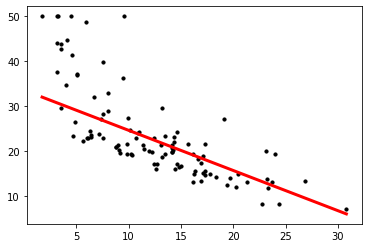

In [32]:
plt.scatter(x_test, y_test, s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.show()

w = sim_lr.coef_[0]
b = sim_lr.intercept_
xs = np.array([4,28])
ys = w*xs+b
ys

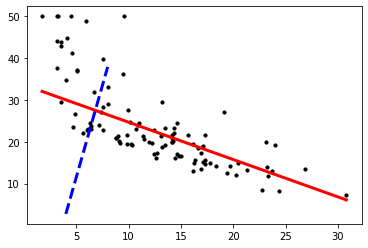

In [33]:
plt.scatter(x_test,y_test,s=10, c='black')
plt.plot(line_x, line_y, c='red', lw=3)
plt.plot(xs,ys,c='blue', lw=3, ls='--')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
def single_regression(x_train, x_test, y_train, y_test):
    slr = LinearRegression()
    slr.fit(x_train.values.reshape(-1,1), y_train)
    y_pred = slr.predict(x_test.values.reshape(-1,1))
    rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    return rmse, slr.coef_[0], slr.intercept_

### Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train.reshape(-1,1), y_train)
y_pred = slr.predict(x_test.reshape(-1,1))
rmse_lr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

 ### Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=5)

In [37]:
dt_regr.fit(x_train.reshape(-1,1),y_train)
dt_regr.fit

<bound method DecisionTreeRegressor.fit of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>

In [38]:
y_pred = dt_regr.predict(x_test.reshape(-1,1))

In [39]:
rmse_dtr = np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

 ### Support Vector Machine Regressor

In [40]:
from sklearn.svm import SVR
svm_regr = SVR()

In [41]:
svm_regr.fit(x_train.reshape(-1,1), y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pred = svm_regr.predict(x_test.reshape(-1,1))

In [43]:
rmse_regr = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)

In [44]:
print(rmse_lr,rmse_dtr,rmse_regr)

7.09 6.16 7.03


### 다중 회귀

In [45]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

In [46]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_data, y_target, test_size=0.3, random_state=156)

In [47]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

In [48]:
print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [49]:
print('절편 값:, lr.intercept_')
print('회귀 계수값: ',np.round(lr.coef_, 1))

절편 값:, lr.intercept_
회귀 계수값:  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [54]:
from sklearn.model_selection import train_test_split
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [56]:
from sklearn.model_selection import cross_val_score

# cross_val_score()로 Fold 셋으로 MSE를 구한 뒤 이를 기반으로 다시 RMSE 구함
neg_mse_scores = cross_val_score(lr, X_data, y_target,
                                scoring = "neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수
print(' 5 folds 의 개별 Negative MSE scores: ' , np.round(neg_mse_scores,2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829


### 5.5 다항 회귀

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X = bostonDF['LSTAT']
pf = poly.fit_transform(X.values.reshape(-1,1))

In [61]:
pf.shape

(506, 3)

In [63]:
x_train, x_test, y_train, y_test = \
    train_test_split(X, Y, test_size = 0.2, random_state=2019)
pf_train = poly.fit_transform(x_train.values.reshape(-1,1))
pf_test = poly.fit_transform(x_test.values.reshape(-1,1))

In [64]:
lr = LinearRegression()
lr.fit(pf_train, y_train)
y_pred = lr.predict(pf_test)
rmse = np.round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
rmse

5.34

In [68]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

#alpha=10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518


In [74]:
#릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

#palphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
#for alpha in alphas : 
#    ridge = 

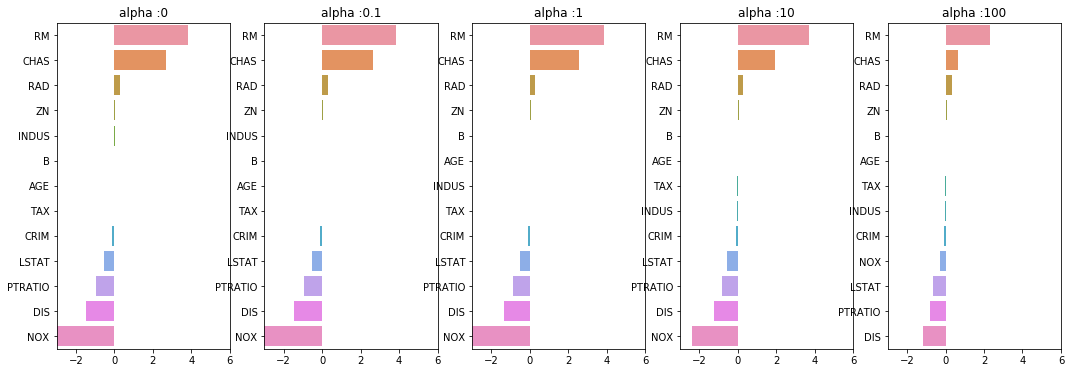

In [78]:
# 각 alpha에 따른 회구 계수 값을 시각화하기 위해 5개의 열로 된 맷플롭립 축 생ㄱ성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

#alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos, alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha에 따른 피처별로 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha :'+str(alpha)
    coeff_df[colname] = coeff
    #막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y = coeff.index, ax=axs[pos])
    
#for 문 바깥에서 맷플롭립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

### 5.7 로지스틱 회귀

### w값과 b값에 따른 시그모이드 함수의 변화

In [82]:
xs = np.linspace(-5,5)
y1 = sigmoid(xs, 1, 0)
y5 = sigmoid(xs, 5, 0)
y05 = sigmoid(xs, 0.5, 0)
plt.plot(xs, y1, lw=2, c='k')
plt.plot(xs, y5, lw=2, c='g')
plt.plot(xs, y05, lw=2, c='r')
plt.show()

NameError: name 'sigmoid' is not defined

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [85]:
from sklearn.preprocessing import StandardScaler

#standardScaler()로 평균이 0, 분산 1로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target,
                                                   test_size=0.3, random_state=0)

In [88]:
from sklearn.metrics import accuracy_score, roc_auc_score

#로지스틱 회귀를 이용해 학습 및 예측 수행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

#정확도와 roc_auc 측정
print('accuracy : {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc : {:0.3f}'.format(roc_auc_score(y_test, lr_preds)))

accuracy : 0.977
roc_auc : 0.972


In [94]:
from sklearn.model_selection import GridSearchCV

params = { 'penalty' : ['12','11'],
       'C': [0.01, 0.1, 1, 1, 5, 10]}

grid_clf = GridSearchCV(lr_clf,param_grid = params, scoring='accuracy', cv=3)
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도 :{1:.3f}'.format(grid_clf.best_params_,
                                                  grid_clf.best_score_))

ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got 12.

In [98]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scorese: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores,2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}',format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scorese:  [ -7.93 -13.06 -20.53 -46.31 -18.8 ]
 5 교차 검증의 개별 RMSE scores:  [2.82 3.61 4.53 6.8  4.34]
 5 교차 검증의 평균 RMSE : {0:.3f} 4.420358097543781


In [106]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv =5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('### ',model.__class__.__name__,' ####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)

#트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg]
for model in models :
    get_model_cv_prediction(model, X_data, y_target)

###  DecisionTreeRegressor  ####
 5 교차 검증의 평균 RMSE : 5.978
###  RandomForestRegressor  ####
 5 교차 검증의 평균 RMSE : 4.420
###  GradientBoostingRegressor  ####
 5 교차 검증의 평균 RMSE : 4.269
[13:38:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:38:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
###  XGBRegressor  ####
 5 교차 검증의 평균 RMSE : 4.089


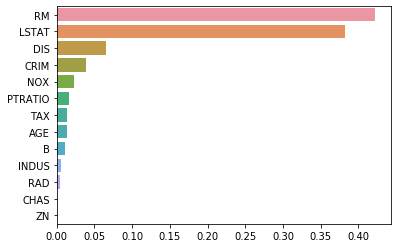

In [108]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series, y=feature_series.index)

(100, 2)


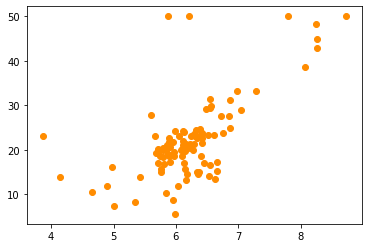

In [111]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")

In [114]:
#선형 회귀와 결틍 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

#실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

#보스턴 주택 가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

#학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2= rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

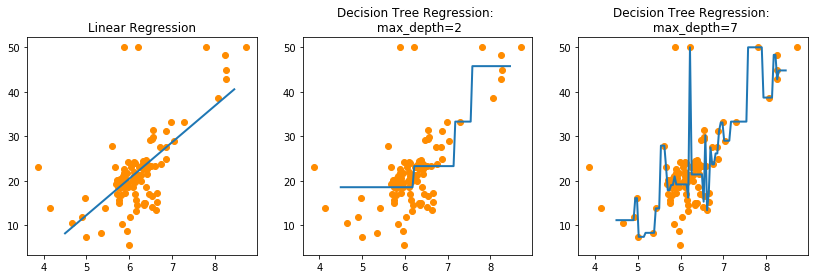

In [118]:
fig,(ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축 값을 4.5~8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
#선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2)

# DecisionTreeRegressor의 max_depth를 2로 했을때 회귀 예측선
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2)

# DecisionTreeRegressor의 max_depth를 7로 했을 떄 회귀 예측선
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)